# **Business Problem - MFP (Music Features Prediction)**: 
Can you predict which music features will be the relevant one in predicting the if a song or a genre will be popular in the future or not?

**Web Scraping from BillBoard Top100 songs**

The aim of this section is to scrape the titles of the top 100 song on billboard weekly for the past 150 weeks.

**Scraping audio features of songs Spotify**


## **Import Packages for Analysis**


In [6]:
# import important packages
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random 
import numpy as np
from time import sleep
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [7]:
import datetime as dt
from datetime import datetime
from datetime import timedelta

In [4]:
# Spotify API
!pip install spotipy

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/main.py", line 13, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 11, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 28, in <module>
    from pip._internal.models.target_python import TargetPython
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/models/target_python.py", line 4, in <module>
    from pip._internal.utils.misc import normalize_version_info
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/utils

In [5]:
# import the rapper to use and a function to authenticate into our dashboard!
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

ModuleNotFoundError: ignored

In [ ]:
# it is a secret text file!! you have to upload it to file in google colab
# you need to do it all in once!
# NEVER SHOW YOUR SECRETS
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
  secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [ ]:
# Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'], client_secret=secrets_dict['csecret']))

## **Scraping info from Billboard top100**

In [39]:
# since i need to retrive different billboard websites based on different dates, I need first to create a list containing dates
current_date = datetime.strptime('2021-05-08', '%Y-%m-%d')
current_date

datetime.datetime(2021, 5, 8, 0, 0)

In [40]:
# On Billboard, different weeks top 100 are always on the saturday of the week. 
# --> Therefore, I need to create for loop to obtain dates separated by 7 starting from the most recent saturday of the month
list_dates = []

for i in range(150):
  week_i = current_date - timedelta(days = i*7)
  list_dates.append(week_i) # insert instead of append put stuff at the beginning of the list instead of the end (first element of list goes on the bottom)

In [41]:
# reverse it to have it ready from oldest to newest week
list_dates.reverse()
list_dates

[datetime.datetime(2018, 6, 30, 0, 0),
 datetime.datetime(2018, 7, 7, 0, 0),
 datetime.datetime(2018, 7, 14, 0, 0),
 datetime.datetime(2018, 7, 21, 0, 0),
 datetime.datetime(2018, 7, 28, 0, 0),
 datetime.datetime(2018, 8, 4, 0, 0),
 datetime.datetime(2018, 8, 11, 0, 0),
 datetime.datetime(2018, 8, 18, 0, 0),
 datetime.datetime(2018, 8, 25, 0, 0),
 datetime.datetime(2018, 9, 1, 0, 0),
 datetime.datetime(2018, 9, 8, 0, 0),
 datetime.datetime(2018, 9, 15, 0, 0),
 datetime.datetime(2018, 9, 22, 0, 0),
 datetime.datetime(2018, 9, 29, 0, 0),
 datetime.datetime(2018, 10, 6, 0, 0),
 datetime.datetime(2018, 10, 13, 0, 0),
 datetime.datetime(2018, 10, 20, 0, 0),
 datetime.datetime(2018, 10, 27, 0, 0),
 datetime.datetime(2018, 11, 3, 0, 0),
 datetime.datetime(2018, 11, 10, 0, 0),
 datetime.datetime(2018, 11, 17, 0, 0),
 datetime.datetime(2018, 11, 24, 0, 0),
 datetime.datetime(2018, 12, 1, 0, 0),
 datetime.datetime(2018, 12, 8, 0, 0),
 datetime.datetime(2018, 12, 15, 0, 0),
 datetime.datetime(201

In [42]:
# build list string because I need it for scraping and not in date format
date_string = [date.strftime('%Y-%m-%d') for date in list_dates]
date_string

['2018-06-30',
 '2018-07-07',
 '2018-07-14',
 '2018-07-21',
 '2018-07-28',
 '2018-08-04',
 '2018-08-11',
 '2018-08-18',
 '2018-08-25',
 '2018-09-01',
 '2018-09-08',
 '2018-09-15',
 '2018-09-22',
 '2018-09-29',
 '2018-10-06',
 '2018-10-13',
 '2018-10-20',
 '2018-10-27',
 '2018-11-03',
 '2018-11-10',
 '2018-11-17',
 '2018-11-24',
 '2018-12-01',
 '2018-12-08',
 '2018-12-15',
 '2018-12-22',
 '2018-12-29',
 '2019-01-05',
 '2019-01-12',
 '2019-01-19',
 '2019-01-26',
 '2019-02-02',
 '2019-02-09',
 '2019-02-16',
 '2019-02-23',
 '2019-03-02',
 '2019-03-09',
 '2019-03-16',
 '2019-03-23',
 '2019-03-30',
 '2019-04-06',
 '2019-04-13',
 '2019-04-20',
 '2019-04-27',
 '2019-05-04',
 '2019-05-11',
 '2019-05-18',
 '2019-05-25',
 '2019-06-01',
 '2019-06-08',
 '2019-06-15',
 '2019-06-22',
 '2019-06-29',
 '2019-07-06',
 '2019-07-13',
 '2019-07-20',
 '2019-07-27',
 '2019-08-03',
 '2019-08-10',
 '2019-08-17',
 '2019-08-24',
 '2019-08-31',
 '2019-09-07',
 '2019-09-14',
 '2019-09-21',
 '2019-09-28',
 '2019-10-

In [ ]:
# for loop to obtain the different URLs from billboard and save it in variable list
songs_info = []

for date in date_string:
    # assemble the url:
    
    url = "https://www.billboard.com/charts/hot-100/"+ date

    # download html with a get request:
    response = requests.get(url)
    #response = requests.get(url, headers = {"Accept-Language": "en-US"}) for getting request in english

    # monitor the process by printing the status code
    print("Status code: " + str(response.status_code))

    # store response into "pages" list
    songs_info.append(response)

    # respectful nap:
    wait_time = randint(1,3)
    print("I will sleep for " + str(wait_time) + " second/s.")
    sleep(wait_time)

Status code: 200
I will sleep for 1 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 1 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 2 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 1 second/s.
Status code: 200
I will sleep for 3 second/s.
Status code: 200
I will sleep for 1 second/s.
Status code: 200
I will sleep for 

In [ ]:
#How to check for content in pages
songs_info[100].content

Output hidden; open in https://colab.research.google.com to view.

### **Getting list of song titles**

In [ ]:
# the BEAST for loop, creating soups for each of the url and extracting name of the song for all links!
all_songs = []

for song in songs_info:
  soup = BeautifulSoup(song.content, "html.parser")
  
  top_songs_billboard = []
  num_iter = len(soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary"))

  for i in range(num_iter):
    top_songs_billboard.append(soup.select("button > span.chart-element__information > span.chart-element__information__song.text--truncate.color--primary")[i].get_text())
  
  all_songs.append(top_songs_billboard)

In [ ]:
len(all_songs)

150

### **Getting list of artists**

In [ ]:
# for loop to create nice lists of TOP artists: iterate through the result set and retrive all the data
all_artists = []

for artist in songs_info:
  soup = BeautifulSoup(artist.content, "html.parser")
  
  top_artists_billboard = []
  num_iter1 = len(soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary"))

  for i in range(num_iter1):
    top_artists_billboard.append(soup.select("button > span.chart-element__information > span.chart-element__information__artist.text--truncate.color--secondary")[i].get_text())
  
  all_artists.append(top_artists_billboard)

In [ ]:
len(all_artists)

150

### **Working with list of songs**

In [ ]:
# and now I am using a flatten function to put all the info merged above in for loop at the same list level
def flatten(input_list):
  return [item for sublist in input_list for item in sublist]

In [ ]:
# apply the flatten function to songs
song_title = flatten(all_songs)
song_title

['Sad!',
 'I Like It',
 'Nice For What',
 'Lucid Dreams',
 'Girls Like You',
 'Psycho',
 "Boo'd Up",
 "God's Plan",
 'No Tears Left To Cry',
 'The Middle',
 'Meant To Be',
 'Yes Indeed',
 'Apes**t',
 'Friends',
 "I'm Upset",
 'Moonlight',
 'This Is America',
 'Changes',
 'Jocelyn Flores',
 'Mine',
 'Perfect',
 'In My Blood',
 'Better Now',
 'Walk It Talk It',
 'Look Alive',
 'Never Be The Same',
 'Delicate',
 'F**k Love',
 'Be Careful',
 'Whatever It Takes',
 'Rockstar',
 'Plug Walk',
 'Back To You',
 'Tequila',
 'Heaven',
 'Love Lies',
 'One Kiss',
 'Taste',
 'Havana',
 'Te Bote',
 'New Rules',
 'Everybody Dies In Their Nightmares',
 'Bed',
 'Wait',
 'All Girls Are The Same',
 'Freaky Friday',
 'I Like Me Better',
 'All Mine',
 'Youngblood',
 'Get Along',
 'Up Down',
 'Chun-Li',
 'Bigger > You',
 'Simple',
 'DDU-DU DDU-DU',
 'IDGAF',
 'One Number Away',
 'The Remedy For A Broken Heart (Why Am I So In Love)',
 'Sit Next To Me',
 'Mercy',
 'Pray For Me',
 'Ball For Me',
 'I Lived It',
 

In [ ]:
# apply the flatten function to artists
artists = flatten(all_artists)

In [ ]:
# splitting a list in two to use it in an easier way
length = len(song_title)
middle_index = length//2

first_half_songs = song_title[:middle_index]
second_half_songs = song_title[middle_index:]

In [ ]:
list_example = second_half_songs[-500:-250]

In [ ]:
second_half_songs[-100:-1]

['Save Your Tears',
 'Leave The Door Open',
 'Peaches',
 'Rapstar',
 'Levitating',
 'Kiss Me More',
 'Montero (Call Me By Your Name)',
 'Astronaut In The Ocean',
 'Up',
 'Drivers License',
 'Blinding Lights',
 'Deja Vu',
 'Beat Box',
 'Calling My Phone',
 'On Me',
 'Best Friend',
 'Heartbreak Anniversary',
 'Beautiful Mistakes',
 'What You Know Bout Love',
 'Mood',
 "My Ex's Best Friend",
 'Back In Blood',
 'Without You',
 'The Good Ones',
 'Go Crazy',
 'You Broke Me First.',
 '34+35',
 'Hell Of A View',
 'Forever After All',
 "What's Next",
 'Time Today',
 'Therefore I Am',
 'Dakiti',
 'Positions',
 'Shottas (Lala)',
 'Solid',
 'Track Star',
 'Ski',
 'Wants And Needs',
 "You're Mines Still",
 "We're Good",
 'Heat Waves',
 'Made For You',
 'Good Days',
 'For The Night',
 "Breaking Up Was Easy In The 90's",
 'No More Parties',
 'Goosebumps',
 'Telepatia',
 'Tombstone',
 'Streets',
 'Go!',
 'Hard For The Next',
 'If Pain Was A Person',
 "What's Your Country Song",
 'Just The Way',
 'Hold

In [ ]:
#spacing the artist to then concatenate the lists together
artist_spaced = [" " + artist for artist in artists]
artist_spaced

[' XXXTENTACION',
 ' Cardi B, Bad Bunny & J Balvin',
 ' Drake',
 ' Juice WRLD',
 ' Maroon 5 Featuring Cardi B',
 ' Post Malone Featuring Ty Dolla $ign',
 ' Ella Mai',
 ' Drake',
 ' Ariana Grande',
 ' Zedd, Maren Morris & Grey',
 ' Bebe Rexha & Florida Georgia Line',
 ' Lil Baby & Drake',
 ' The Carters',
 ' Marshmello & Anne-Marie',
 ' Drake',
 ' XXXTENTACION',
 ' Childish Gambino',
 ' XXXTENTACION',
 ' XXXTENTACION',
 ' Bazzi',
 ' Ed Sheeran',
 ' Shawn Mendes',
 ' Post Malone',
 ' Migos Featuring Drake',
 ' BlocBoy JB Featuring Drake',
 ' Camila Cabello',
 ' Taylor Swift',
 ' XXXTENTACION Featuring Trippie Redd',
 ' Cardi B',
 ' Imagine Dragons',
 ' Post Malone Featuring 21 Savage',
 ' Rich The Kid',
 ' Selena Gomez',
 ' Dan + Shay',
 ' Kane Brown',
 ' Khalid & Normani',
 ' Calvin Harris & Dua Lipa',
 ' Tyga Featuring Offset',
 ' Camila Cabello Featuring Young Thug',
 ' Casper Magico, Nio Garcia, Darell, Nicky Jam, Ozuna & Bad Bunny',
 ' Dua Lipa',
 ' XXXTENTACION',
 ' Nicki Minaj Fea

In [ ]:
# create a search list to feed to spotify API
search_list = []

for (item1, item2) in zip(song_title, artist_spaced):
    search_list.append(item1 + item2)

print(search_list)

['Sad! XXXTENTACION', 'I Like It Cardi B, Bad Bunny & J Balvin', 'Nice For What Drake', 'Lucid Dreams Juice WRLD', 'Girls Like You Maroon 5 Featuring Cardi B', 'Psycho Post Malone Featuring Ty Dolla $ign', "Boo'd Up Ella Mai", "God's Plan Drake", 'No Tears Left To Cry Ariana Grande', 'The Middle Zedd, Maren Morris & Grey', 'Meant To Be Bebe Rexha & Florida Georgia Line', 'Yes Indeed Lil Baby & Drake', 'Apes**t The Carters', 'Friends Marshmello & Anne-Marie', "I'm Upset Drake", 'Moonlight XXXTENTACION', 'This Is America Childish Gambino', 'Changes XXXTENTACION', 'Jocelyn Flores XXXTENTACION', 'Mine Bazzi', 'Perfect Ed Sheeran', 'In My Blood Shawn Mendes', 'Better Now Post Malone', 'Walk It Talk It Migos Featuring Drake', 'Look Alive BlocBoy JB Featuring Drake', 'Never Be The Same Camila Cabello', 'Delicate Taylor Swift', 'F**k Love XXXTENTACION Featuring Trippie Redd', 'Be Careful Cardi B', 'Whatever It Takes Imagine Dragons', 'Rockstar Post Malone Featuring 21 Savage', 'Plug Walk Rich 

## **Getting songs information from Spotify**

In [ ]:
# defining function to get the audio_features informations from spotify for each song
# fed with title list
def get_audio_features(x):
  results = sp.search(q=x, limit=1)
  song_uri = results['tracks']['items'][0]['uri']
  audio_features = sp.audio_features(song_uri)
  audio_features_df = pd.DataFrame(audio_features)
  return audio_features_df

In [ ]:
# FIRST HALF SONG (first_half_songs) --> Applying the function using a for loop to iterate trhough all the song for the spotipy API search
df1_audio_features_FIRST = pd.DataFrame({})
for song in first_half_songs:
  df1_audio_features_FIRST = df1_audio_features_FIRST.append(get_audio_features(song))

In [ ]:
df1_audio_features_FIRST

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.740,0.613,8,-4.880,1,0.1450,0.25800,0.003720,0.1230,0.473,75.023,audio_features,3ee8Jmje8o58CHK66QrVC2,spotify:track:3ee8Jmje8o58CHK66QrVC2,https://api.spotify.com/v1/tracks/3ee8Jmje8o58...,https://api.spotify.com/v1/audio-analysis/3ee8...,166606,4
0,0.816,0.726,5,-3.998,0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,audio_features,58q2HKrzhC3ozto2nDdN4z,spotify:track:58q2HKrzhC3ozto2nDdN4z,https://api.spotify.com/v1/tracks/58q2HKrzhC3o...,https://api.spotify.com/v1/audio-analysis/58q2...,253390,4
0,0.585,0.909,8,-6.474,1,0.0707,0.08910,0.000097,0.1190,0.758,93.372,audio_features,3CA9pLiwRIGtUBiMjbZmRw,spotify:track:3CA9pLiwRIGtUBiMjbZmRw,https://api.spotify.com/v1/tracks/3CA9pLiwRIGt...,https://api.spotify.com/v1/audio-analysis/3CA9...,210747,4
0,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,audio_features,285pBltuF7vW8TeWk8hdRR,spotify:track:285pBltuF7vW8TeWk8hdRR,https://api.spotify.com/v1/tracks/285pBltuF7vW...,https://api.spotify.com/v1/audio-analysis/285p...,239836,4
0,0.611,0.462,0,-7.054,1,0.0646,0.55800,0.000001,0.1310,0.377,59.635,audio_features,6OEHjJJvdkk1Ln0p0AZdyz,spotify:track:6OEHjJJvdkk1Ln0p0AZdyz,https://api.spotify.com/v1/tracks/6OEHjJJvdkk1...,https://api.spotify.com/v1/audio-analysis/6OEH...,215230,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.899,0.509,9,-8.040,1,0.3870,0.00157,0.000000,0.0573,0.599,150.001,audio_features,00ko9WaS4jOX1kEk3gvHjf,spotify:track:00ko9WaS4jOX1kEk3gvHjf,https://api.spotify.com/v1/tracks/00ko9WaS4jOX...,https://api.spotify.com/v1/audio-analysis/00ko...,225924,4
0,0.726,0.431,8,-8.765,0,0.1350,0.73100,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,spotify:track:7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
0,0.866,0.438,7,-8.943,1,0.0719,0.17700,0.000000,0.0743,0.695,129.039,audio_features,2W4yABdLc4Jnds67Poi5Nl,spotify:track:2W4yABdLc4Jnds67Poi5Nl,https://api.spotify.com/v1/tracks/2W4yABdLc4Jn...,https://api.spotify.com/v1/audio-analysis/2W4y...,223258,4
0,0.551,0.821,7,-6.160,1,0.0453,0.09150,0.000004,0.1550,0.519,75.979,audio_features,3y8xKFhQWc8DARB3fuGMGA,spotify:track:3y8xKFhQWc8DARB3fuGMGA,https://api.spotify.com/v1/tracks/3y8xKFhQWc8D...,https://api.spotify.com/v1/audio-analysis/3y8x...,207480,4


In [ ]:
# SECOND HALF SONG --> Applying the function using a for loop to iterate trhough all the song for the spotipy API search
df2_audio_features_SECOND = pd.DataFrame({})
failed = False
for song in second_half_songs:
  try:
    df2_audio_features_SECOND = df2_audio_features_SECOND.append(get_audio_features(song))
    if failed == True:
      df2_audio_features_SECOND = df2_audio_features_SECOND.append(get_audio_features(song))
      failed = False
  except IndexError:
    failed = True
    pass

In [ ]:
df2_audio_features_SECOND.reset_index(drop=True)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,audio_features,21jGcNKet2qwijlDFuPiPb,spotify:track:21jGcNKet2qwijlDFuPiPb,https://api.spotify.com/v1/tracks/21jGcNKet2qw...,https://api.spotify.com/v1/audio-analysis/21jG...,215280,4
1,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,audio_features,7qEHsqek33rTcFNT9PFqLf,spotify:track:7qEHsqek33rTcFNT9PFqLf,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,https://api.spotify.com/v1/audio-analysis/7qEH...,182161,4
2,0.682,0.919,0,-3.180,0,0.0875,0.25600,0.000000,0.4420,0.535,95.982,audio_features,6KgBpzTuTRPebChN0VTyzV,spotify:track:6KgBpzTuTRPebChN0VTyzV,https://api.spotify.com/v1/tracks/6KgBpzTuTRPe...,https://api.spotify.com/v1/audio-analysis/6KgB...,159736,4
3,0.764,0.320,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,audio_features,2b8fOow8UzyDFAE27YhOZM,spotify:track:2b8fOow8UzyDFAE27YhOZM,https://api.spotify.com/v1/tracks/2b8fOow8UzyD...,https://api.spotify.com/v1/audio-analysis/2b8f...,189486,4
4,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,audio_features,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://api.spotify.com/v1/tracks/696DnlkuDOXc...,https://api.spotify.com/v1/audio-analysis/696D...,163636,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.722,100.482,audio_features,4KIkADzoVm3A10E9qyjsQ5,spotify:track:4KIkADzoVm3A10E9qyjsQ5,https://api.spotify.com/v1/tracks/4KIkADzoVm3A...,https://api.spotify.com/v1/audio-analysis/4KIk...,155720,4
7496,0.484,0.783,2,-5.334,1,0.0308,0.09570,0.000118,0.1070,0.594,137.918,audio_features,2CwG4BXIlGmmYLDmDvwMTH,spotify:track:2CwG4BXIlGmmYLDmDvwMTH,https://api.spotify.com/v1/tracks/2CwG4BXIlGmm...,https://api.spotify.com/v1/audio-analysis/2CwG...,215360,4
7497,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
7498,0.701,0.547,2,-8.238,1,0.0483,0.00843,0.000000,0.0987,0.400,140.015,audio_features,4jbtL4tjkqghUvJknUqU1s,spotify:track:4jbtL4tjkqghUvJknUqU1s,https://api.spotify.com/v1/tracks/4jbtL4tjkqgh...,https://api.spotify.com/v1/audio-analysis/4jbt...,206108,4


In [ ]:
from google.colab import files
df1_audio_features_FIRST.to_csv('df1_audio_features_FIRST.csv')

In [ ]:
from google.colab import files
df2_audio_features_SECOND.to_csv('df2_audio_features_SECOND.csv')

In [ ]:
# concatenating the two audio features datasets in one
df_audio_features = pd.concat([df1_audio_features_FIRST,df2_audio_features_SECOND], axis=0)

In [ ]:
df_audio_features = df_audio_features.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.740,0.613,8,-4.880,1,0.1450,0.25800,0.003720,0.1230,0.473,75.023,audio_features,3ee8Jmje8o58CHK66QrVC2,spotify:track:3ee8Jmje8o58CHK66QrVC2,https://api.spotify.com/v1/tracks/3ee8Jmje8o58...,https://api.spotify.com/v1/audio-analysis/3ee8...,166606,4
1,0.816,0.726,5,-3.998,0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,audio_features,58q2HKrzhC3ozto2nDdN4z,spotify:track:58q2HKrzhC3ozto2nDdN4z,https://api.spotify.com/v1/tracks/58q2HKrzhC3o...,https://api.spotify.com/v1/audio-analysis/58q2...,253390,4
2,0.585,0.909,8,-6.474,1,0.0707,0.08910,0.000097,0.1190,0.758,93.372,audio_features,3CA9pLiwRIGtUBiMjbZmRw,spotify:track:3CA9pLiwRIGtUBiMjbZmRw,https://api.spotify.com/v1/tracks/3CA9pLiwRIGt...,https://api.spotify.com/v1/audio-analysis/3CA9...,210747,4
3,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,audio_features,285pBltuF7vW8TeWk8hdRR,spotify:track:285pBltuF7vW8TeWk8hdRR,https://api.spotify.com/v1/tracks/285pBltuF7vW...,https://api.spotify.com/v1/audio-analysis/285p...,239836,4
4,0.611,0.462,0,-7.054,1,0.0646,0.55800,0.000001,0.1310,0.377,59.635,audio_features,6OEHjJJvdkk1Ln0p0AZdyz,spotify:track:6OEHjJJvdkk1Ln0p0AZdyz,https://api.spotify.com/v1/tracks/6OEHjJJvdkk1...,https://api.spotify.com/v1/audio-analysis/6OEH...,215230,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.722,100.482,audio_features,4KIkADzoVm3A10E9qyjsQ5,spotify:track:4KIkADzoVm3A10E9qyjsQ5,https://api.spotify.com/v1/tracks/4KIkADzoVm3A...,https://api.spotify.com/v1/audio-analysis/4KIk...,155720,4
0,0.484,0.783,2,-5.334,1,0.0308,0.09570,0.000118,0.1070,0.594,137.918,audio_features,2CwG4BXIlGmmYLDmDvwMTH,spotify:track:2CwG4BXIlGmmYLDmDvwMTH,https://api.spotify.com/v1/tracks/2CwG4BXIlGmm...,https://api.spotify.com/v1/audio-analysis/2CwG...,215360,4
0,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
0,0.701,0.547,2,-8.238,1,0.0483,0.00843,0.000000,0.0987,0.400,140.015,audio_features,4jbtL4tjkqghUvJknUqU1s,spotify:track:4jbtL4tjkqghUvJknUqU1s,https://api.spotify.com/v1/tracks/4jbtL4tjkqgh...,https://api.spotify.com/v1/audio-analysis/4jbt...,206108,4


In [ ]:
# resetting index after creating audio-features dataset
df_audio_features = df_audio_features.reset_index(drop=True)

In [ ]:
# creating final dataset billboard with title and artist
songs_title_df = pd.DataFrame(song_title).reset_index(drop=True)
artists_df = pd.DataFrame(artists).reset_index(drop=True)
final_dataset_billboard = pd.concat([songs_title_df,artists_df], axis=1)

In [ ]:
# changing names of columns
final_dataset_billboard.columns=['title', 'artist']
final_dataset_billboard.head(2)

,title,artist
0,Sad!,XXXTENTACION
1,I Like It,"Cardi B, Bad Bunny & J Balvin"


In [ ]:
# creating final dataset for analysis
data_music = pd.concat([final_dataset_billboard,df_audio_features], axis=1)

In [ ]:
# dropping not useful information
data_music = data_music.drop(['type', 'id','uri','track_href','analysis_url'], axis=1)
data_music.head(4)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Sad!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4
1,I Like It,"Cardi B, Bad Bunny & J Balvin",0.816,0.726,5,-3.998,0,0.1290,0.0990,0.000000,0.372,0.650,136.048,253390,4
2,Nice For What,Drake,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.119,0.758,93.372,210747,4
3,Lucid Dreams,Juice WRLD,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.340,0.218,83.903,239836,4


In [ ]:
# validating if audio features are the correct one for each song
example_df = ["Sad!","I Like It"]
df_validation = pd.DataFrame({})

for song in example_df:
  df_validation = df_validation.append(get_audio_features(song))

df_validation

In [ ]:
# transform ms in minutes by dividing by 60000
data_music['duration_ms'] = data_music['duration_ms'].div(60000)
data_music

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Sad!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.25800,0.003720,0.1230,0.473,75.023,2.776767,4
1,I Like It,"Cardi B, Bad Bunny & J Balvin",0.816,0.726,5,-3.998,0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,4.223167,4
2,Nice For What,Drake,0.585,0.909,8,-6.474,1,0.0707,0.08910,0.000097,0.1190,0.758,93.372,3.512450,4
3,Lucid Dreams,Juice WRLD,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,3.997267,4
4,Girls Like You,Maroon 5 Featuring Cardi B,0.611,0.462,0,-7.054,1,0.0646,0.55800,0.000001,0.1310,0.377,59.635,3.587167,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4 Da Gang,42 Dugg & Roddy Ricch,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.722,100.482,2.595333,4
14996,Blame It On You,Jason Aldean,0.484,0.783,2,-5.334,1,0.0308,0.09570,0.000118,0.1070,0.594,137.918,3.589333,4
14997,Wasted On You,Morgan Wallen,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,2.975333,3
14998,Way Less Sad,AJR,0.701,0.547,2,-8.238,1,0.0483,0.00843,0.000000,0.0987,0.400,140.015,3.435133,4


In [ ]:
# creating a list of dates to concatenate to dataset. Later, we will understand and divide datasets accordingly
list_dates_repetead = []

for i in date_string:
  date_result = [i] * 100
  list_dates_repetead.append(date_result)

In [ ]:
# flattening the list just created
list_dates_df = flatten(list_dates_repetead)
# creating a dataset to concat later to main one
dates_df = pd.DataFrame(list_dates_df).reset_index(drop=True)
dates_df.columns=['date_popularity']

NameError: ignored

In [ ]:
# create a list of week from 1 to 150 week
week_count = (range(0, 150))
len(week_count)

150

In [ ]:
# creating a list of weeks to concatenate to dataset. Later, we will understand and divide datasets accordingly
list_week_count = []

for i in week_count:
  week_result = [i] * 100
  list_week_count.append(week_result)

In [ ]:
# flatten the list of weeks
list_week_count_flatten = flatten(list_week_count)
#create dataset
week_df = pd.DataFrame(list_week_count_flatten).reset_index(drop=True)
week_df.columns=['week_popularity']
week_df.head(2)

,week_popularity
0,0
1,0


In [ ]:
# concatenate date with main dataset
data_music_dates = pd.concat([data_music,dates_df,week_df], axis=1)
data_music_dates.head(10)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,date_popularity,week_popularity
0,Sad!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,2.776767,4,2018-06-30,0
1,I Like It,"Cardi B, Bad Bunny & J Balvin",0.816,0.726,5,-3.998,0,0.1290,0.0990,0.000000,0.372,0.650,136.048,4.223167,4,2018-06-30,0
2,Nice For What,Drake,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.119,0.758,93.372,3.512450,4,2018-06-30,0
3,Lucid Dreams,Juice WRLD,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.340,0.218,83.903,3.997267,4,2018-06-30,0
4,Girls Like You,Maroon 5 Featuring Cardi B,0.611,0.462,0,-7.054,1,0.0646,0.5580,0.000001,0.131,0.377,59.635,3.587167,4,2018-06-30,0
5,Psycho,Post Malone Featuring Ty Dolla $ign,0.750,0.560,8,-8.094,1,0.1050,0.5460,0.000000,0.111,0.459,140.060,3.690667,4,2018-06-30,0
6,Boo'd Up,Ella Mai,0.561,0.779,10,-5.107,0,0.0531,0.0862,0.000000,0.078,0.235,81.965,4.267733,4,2018-06-30,0
7,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,3.316217,4,2018-06-30,0
8,No Tears Left To Cry,Ariana Grande,0.699,0.713,9,-5.507,0,0.0594,0.0400,0.000003,0.294,0.354,121.993,3.432000,4,2018-06-30,0
9,The Middle,"Zedd, Maren Morris & Grey",0.643,0.849,2,-5.428,1,0.0526,0.0371,0.000000,0.058,0.903,162.152,2.764217,4,2018-06-30,0


In [ ]:
# converting date to datetime
data_music_dates['date_popularity'] = pd.to_datetime(data_music_dates['date_popularity'])

In [ ]:
# download original dataset to later use
from google.colab import files
data_music_dates.to_csv('data_music_dates.csv')

## **2nd Part of the project**

In [11]:
data_music_dates = pd.read_csv('data_music_dates.csv')
data_music_dates

,Unnamed: 0,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,date_popularity,week_popularity
0,0,Sad!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.25800,0.003720,0.1230,0.473,75.023,2.776767,4,2018-06-30,0
1,1,I Like It,"Cardi B, Bad Bunny & J Balvin",0.816,0.726,5,-3.998,0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,4.223167,4,2018-06-30,0
2,2,Nice For What,Drake,0.585,0.909,8,-6.474,1,0.0707,0.08910,0.000097,0.1190,0.758,93.372,3.512450,4,2018-06-30,0
3,3,Lucid Dreams,Juice WRLD,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,3.997267,4,2018-06-30,0
4,4,Girls Like You,Maroon 5 Featuring Cardi B,0.611,0.462,0,-7.054,1,0.0646,0.55800,0.000001,0.1310,0.377,59.635,3.587167,4,2018-06-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,4 Da Gang,42 Dugg & Roddy Ricch,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.722,100.482,2.595333,4,2021-05-08,149
14996,14996,Blame It On You,Jason Aldean,0.484,0.783,2,-5.334,1,0.0308,0.09570,0.000118,0.1070,0.594,137.918,3.589333,4,2021-05-08,149
14997,14997,Wasted On You,Morgan Wallen,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,2.975333,3,2021-05-08,149
14998,14998,Way Less Sad,AJR,0.701,0.547,2,-8.238,1,0.0483,0.00843,0.000000,0.0987,0.400,140.015,3.435133,4,2021-05-08,149


In [12]:
# dropping for now the column date
dropped_columns = data_music_dates.filter(['title','artist','date_popularity','week_popularity'], axis=1)
data_music_dates = data_music_dates.drop(['date_popularity','week_popularity','Unnamed: 0'], axis=1)
data_music_dates.head(4)

,title,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Sad!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,2.776767,4
1,I Like It,"Cardi B, Bad Bunny & J Balvin",0.816,0.726,5,-3.998,0,0.1290,0.0990,0.000000,0.372,0.650,136.048,4.223167,4
2,Nice For What,Drake,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.119,0.758,93.372,3.512450,4
3,Lucid Dreams,Juice WRLD,0.511,0.566,6,-7.230,0,0.2000,0.3490,0.000000,0.340,0.218,83.903,3.997267,4


In [ ]:
data_music_dates.dtypes

title                object
artist               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
time_signature        int64
dtype: object

In [13]:
# min max scale all variables to not do that later on
data_music_dates_num = data_music_dates.select_dtypes(include=np.number)
data_music_dates_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.740,0.613,8,-4.880,1,0.1450,0.25800,0.003720,0.1230,0.473,75.023,2.776767,4
1,0.816,0.726,5,-3.998,0,0.1290,0.09900,0.000000,0.3720,0.650,136.048,4.223167,4
2,0.585,0.909,8,-6.474,1,0.0707,0.08910,0.000097,0.1190,0.758,93.372,3.512450,4
3,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,3.997267,4
4,0.611,0.462,0,-7.054,1,0.0646,0.55800,0.000001,0.1310,0.377,59.635,3.587167,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.871,0.545,7,-10.489,1,0.1890,0.01430,0.000000,0.1480,0.722,100.482,2.595333,4
14996,0.484,0.783,2,-5.334,1,0.0308,0.09570,0.000118,0.1070,0.594,137.918,3.589333,4
14997,0.505,0.657,11,-5.240,0,0.0318,0.37300,0.001070,0.1260,0.252,196.000,2.975333,3
14998,0.701,0.547,2,-8.238,1,0.0483,0.00843,0.000000,0.0987,0.400,140.015,3.435133,4


In [14]:
# min max scale all the dataset
X_prep = MinMaxScaler().fit_transform(data_music_dates_num)
x = pd.DataFrame(X_prep,columns=data_music_dates_num.columns)
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.710462,0.600820,0.727273,0.851704,1.0,0.169685,0.259190,0.003903,0.108352,0.467161,0.122623,0.212717,0.75
1,0.802920,0.722732,0.454545,0.893109,0.0,0.147395,0.099368,0.000000,0.389391,0.654661,0.491684,0.355167,0.75
2,0.521898,0.920164,0.727273,0.776875,1.0,0.066174,0.089417,0.000102,0.103837,0.769068,0.233593,0.285172,0.75
3,0.431873,0.550113,0.545455,0.741386,0.0,0.246308,0.350660,0.000000,0.353273,0.197034,0.176327,0.332919,0.75
4,0.553528,0.437911,0.000000,0.749648,1.0,0.057676,0.560741,0.000001,0.117381,0.365466,0.029561,0.292530,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.869830,0.527457,0.636364,0.588395,1.0,0.230984,0.014230,0.000000,0.136569,0.730932,0.276592,0.194849,0.75
14996,0.399027,0.784227,0.181818,0.830392,1.0,0.010588,0.096051,0.000124,0.090293,0.595339,0.502994,0.292744,0.75
14997,0.424574,0.648290,1.000000,0.834804,0.0,0.011981,0.374785,0.001123,0.111738,0.233051,0.854256,0.232273,0.50
14998,0.663017,0.529615,0.181818,0.694066,1.0,0.034968,0.008330,0.000000,0.080926,0.389831,0.515676,0.277557,0.75


In [15]:
# re merging the dataset with artist and song
x.reset_index(drop=True)
data_music_scaled = pd.concat([dropped_columns,x], axis=1)

In [ ]:
data_music_scaled

,title,artist,date_popularity,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Sad!,XXXTENTACION,2018-06-30,0,0.710462,0.600820,0.727273,0.851704,1.0,0.169685,0.259190,0.003903,0.108352,0.467161,0.122623,0.212717,0.75
1,I Like It,"Cardi B, Bad Bunny & J Balvin",2018-06-30,0,0.802920,0.722732,0.454545,0.893109,0.0,0.147395,0.099368,0.000000,0.389391,0.654661,0.491684,0.355167,0.75
2,Nice For What,Drake,2018-06-30,0,0.521898,0.920164,0.727273,0.776875,1.0,0.066174,0.089417,0.000102,0.103837,0.769068,0.233593,0.285172,0.75
3,Lucid Dreams,Juice WRLD,2018-06-30,0,0.431873,0.550113,0.545455,0.741386,0.0,0.246308,0.350660,0.000000,0.353273,0.197034,0.176327,0.332919,0.75
4,Girls Like You,Maroon 5 Featuring Cardi B,2018-06-30,0,0.553528,0.437911,0.000000,0.749648,1.0,0.057676,0.560741,0.000001,0.117381,0.365466,0.029561,0.292530,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4 Da Gang,42 Dugg & Roddy Ricch,2021-05-08,149,0.869830,0.527457,0.636364,0.588395,1.0,0.230984,0.014230,0.000000,0.136569,0.730932,0.276592,0.194849,0.75
14996,Blame It On You,Jason Aldean,2021-05-08,149,0.399027,0.784227,0.181818,0.830392,1.0,0.010588,0.096051,0.000124,0.090293,0.595339,0.502994,0.292744,0.75
14997,Wasted On You,Morgan Wallen,2021-05-08,149,0.424574,0.648290,1.000000,0.834804,0.0,0.011981,0.374785,0.001123,0.111738,0.233051,0.854256,0.232273,0.50
14998,Way Less Sad,AJR,2021-05-08,149,0.663017,0.529615,0.181818,0.694066,1.0,0.034968,0.008330,0.000000,0.080926,0.389831,0.515676,0.277557,0.75


## **Data exploration and modelling - Week 0 K-Means**

In [16]:
# Create a list of dataframes to ease up the analysis later on
musics_per_week_scaled = []
for i in range(150):
  musics_per_week_scaled.append(data_music_scaled.iloc[i*100:(i+1)*100,:])

In [19]:
# inspecting one of the dictionaries
music_week_0_scaled = musics_per_week_scaled[0]

In [20]:
# only get numeric variables
music_week_0_num = music_week_0_scaled.select_dtypes(include=np.number)
music_week_0_num = music_week_0_num.drop(['week_popularity'], axis=1)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

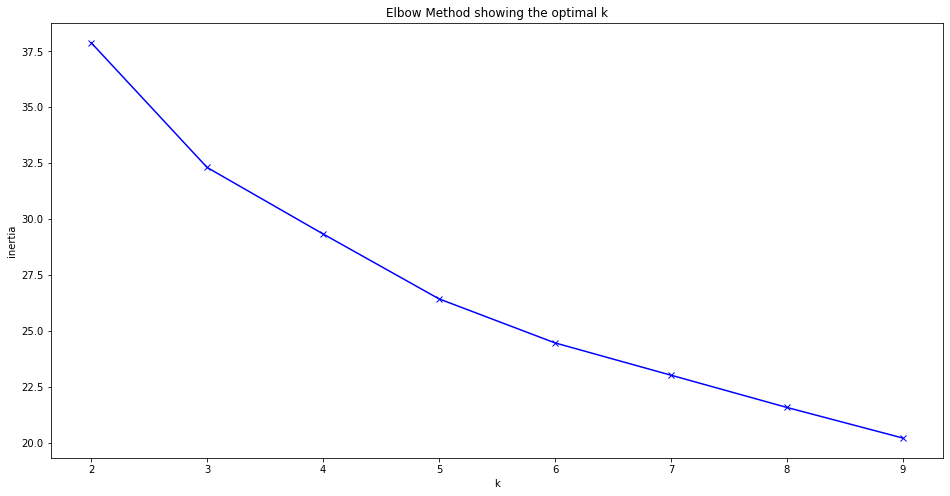

In [21]:
# INERTIA SCORE AND ELBOW PLOT

from sklearn.cluster import KMeans
K = range(2, 10)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(music_week_0_num)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

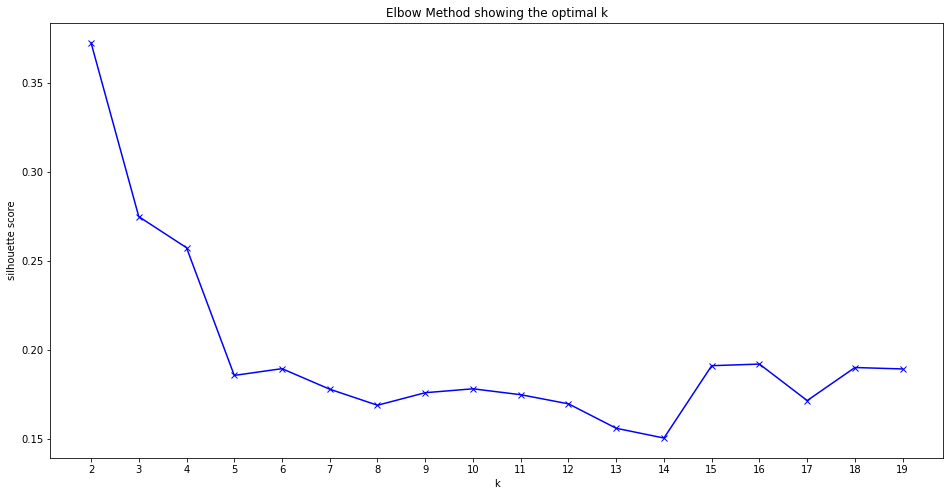

In [22]:
# SILOUETTE SCORE
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(music_week_0_num)
    silhouette.append(silhouette_score(music_week_0_num, kmeans.predict(music_week_0_num)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [23]:
# running the k-means after looking at the optimization for n of clusters

kmeans = KMeans(n_clusters=3,
                init="random", # initial points at random
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...# how many times restarts the algorithm
                max_iter=100, # how many times, in each of initializations, reconvert center and assigning points
                tol=0,
                random_state=1234)
kmeans.fit(music_week_0_num)
print(kmeans.inertia_)

32.30611628102585


In [24]:
# Predicting / assigning the clusters:

# CANNOT PLOT many columns at the same time, but can run KMeans, it is just a measurement of distance!
clusters = kmeans.predict(music_week_0_num)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    32
1    41
2    27
dtype: int64

In [25]:
# create cluster dataframe to then concat to the original dataframe
music_clusters = pd.DataFrame(clusters)
music_clusters.columns=['music_clusters']
music_clusters.reset_index(drop=True)

,music_clusters
0,2
1,1
2,2
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [26]:
# finally concat the dataset with week_0 features
week_0_clustered = pd.concat([music_week_0_scaled,music_clusters], axis=1)

In [11]:
week_0_clustered.head(40)

,title,artist,date_popularity,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,music_clusters
0,Sad!,XXXTENTACION,2018-06-30,0,0.710462,0.600820,0.727273,0.851704,1.0,0.169685,0.259190,0.003903,0.108352,0.467161,0.122623,0.212717,0.75,2
1,I Like It,"Cardi B, Bad Bunny & J Balvin",2018-06-30,0,0.802920,0.722732,0.454545,0.893109,0.0,0.147395,0.099368,0.000000,0.389391,0.654661,0.491684,0.355167,0.75,1
2,Nice For What,Drake,2018-06-30,0,0.521898,0.920164,0.727273,0.776875,1.0,0.066174,0.089417,0.000102,0.103837,0.769068,0.233593,0.285172,0.75,2
3,Lucid Dreams,Juice WRLD,2018-06-30,0,0.431873,0.550113,0.545455,0.741386,0.0,0.246308,0.350660,0.000000,0.353273,0.197034,0.176327,0.332919,0.75,1
4,Girls Like You,Maroon 5 Featuring Cardi B,2018-06-30,0,0.553528,0.437911,0.000000,0.749648,1.0,0.057676,0.560741,0.000001,0.117381,0.365466,0.029561,0.292530,0.75,0
5,Psycho,Post Malone Featuring Ty Dolla $ign,2018-06-30,0,0.722628,0.543640,0.727273,0.700826,1.0,0.113959,0.548679,0.000000,0.094808,0.452331,0.515948,0.302723,0.75,2
6,Boo'd Up,Ella Mai,2018-06-30,0,0.492701,0.779912,0.909091,0.841048,0.0,0.041655,0.086502,0.000000,0.057562,0.215042,0.164606,0.359556,0.75,1
7,God's Plan,Drake,2018-06-30,0,0.727494,0.423886,0.636364,0.648390,1.0,0.119532,0.033228,0.000087,0.592551,0.344280,0.135602,0.265846,0.75,2
8,No Tears Left To Cry,Ariana Grande,2018-06-30,0,0.660584,0.708706,0.818182,0.822270,0.0,0.050432,0.040063,0.000003,0.301354,0.341102,0.406684,0.277249,0.75,1
9,The Middle,"Zedd, Maren Morris & Grey",2018-06-30,0,0.592457,0.855432,0.181818,0.825979,1.0,0.040958,0.037148,0.000000,0.034989,0.922669,0.649554,0.211481,0.75,0


In [12]:
week_0_clustered.tail(40)

,title,artist,date_popularity,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,music_clusters
59,Mercy,Brett Young,2018-06-30,0,0.485401,0.653684,1.000000,0.848324,0.0,0.082892,0.125502,0.000000,0.094808,0.343220,0.564741,0.281866,0.75,1
60,Pray For Me,The Weeknd & Kendrick Lamar,2018-06-30,0,0.700730,0.670946,0.181818,0.847151,1.0,0.091112,0.087004,0.000025,0.095937,0.173729,0.277463,0.286278,0.75,0
61,Ball For Me,Post Malone Featuring Nicki Minaj,2018-06-30,0,0.779805,0.532851,0.818182,0.885222,1.0,0.302034,0.515508,0.000000,0.058239,0.541314,0.480545,0.277818,0.75,2
62,I Lived It,Blake Shelton,2018-06-30,0,0.487835,0.555508,0.909091,0.700263,1.0,0.006826,0.478317,0.001196,0.083521,0.381356,0.158655,0.299703,0.75,2
63,Japan,Famous Dex,2018-06-30,0,0.670316,0.196246,0.272727,0.666839,1.0,0.020479,0.090824,0.000003,0.064560,0.331568,0.419765,0.383821,0.50,0
64,Fake Love,BTS,2018-06-30,0,0.939173,0.458410,0.818182,0.641865,0.0,0.367512,0.105399,0.000000,0.168172,0.615466,0.479341,0.285484,0.75,1
65,Done For Me,Charlie Puth Featuring Kehlani,2018-06-30,0,0.851582,0.621318,0.545455,0.907473,0.0,0.070772,0.193854,0.000000,0.047178,0.704449,0.346304,0.235512,0.75,1
66,Yikes,Kanye West,2018-06-30,0,0.918491,0.626713,0.727273,0.687353,1.0,0.590415,0.040968,0.000039,0.238149,0.665254,0.576038,0.196756,0.75,2
67,TATI,6ix9ine Featuring DJ SPINKING,2018-06-30,0,0.757908,0.766965,1.000000,0.824383,0.0,0.327111,0.002007,0.000000,0.084650,0.520127,0.225180,0.192953,0.75,1
68,X,Nicky Jam x J Balvin,2018-06-30,0,0.700730,0.748624,1.000000,0.781945,0.0,0.289496,0.002510,0.000000,0.092551,0.390890,0.606881,0.239146,0.75,1


In [108]:
# dowload this dataset as with K-Means clusters could change!!
from google.colab import files
week_0_clustered.to_csv('week_0_kmeans_clusters.csv')

## **Discussion and Hypothesis** 
**Objectives of analysis:**
- define clusters based on features
- create hypothesis based on trends I believe might become reality

**Cluster 0 = 32 songs:** 

--> average_cluster: + energy, loudness and tempo - (low key, valence)

**Cluster 1 = 41 songs:**

--> danceability_pop: + danceability and speechiness (commercial success, most stable). Conservative clusters, pop = follow commercial formula.

**Cluster 2 = 27 songs:**

--> trap: + instrumentalness and acousticness - (low energy)



**Based on clustering I will set hypothesis:**

- H1: There will be an increase in instrumentalness overtime compared to all the other features.
- H2: Cluster 1 will maintain a similar set of features over time, compared to cluster 0 and 2




In [ ]:
#[len(week) for week in musics_per_week_scaled]

In [10]:
week_0_clustered = pd.read_csv('week_0_kmeans_clusters.csv', index_col=0)

week_0_clustered.tail(40)

,title,artist,date_popularity,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,music_clusters
59,Mercy,Brett Young,2018-06-30,0,0.485401,0.653684,1.000000,0.848324,0.0,0.082892,0.125502,0.000000,0.094808,0.343220,0.564741,0.281866,0.75,1
60,Pray For Me,The Weeknd & Kendrick Lamar,2018-06-30,0,0.700730,0.670946,0.181818,0.847151,1.0,0.091112,0.087004,0.000025,0.095937,0.173729,0.277463,0.286278,0.75,0
61,Ball For Me,Post Malone Featuring Nicki Minaj,2018-06-30,0,0.779805,0.532851,0.818182,0.885222,1.0,0.302034,0.515508,0.000000,0.058239,0.541314,0.480545,0.277818,0.75,2
62,I Lived It,Blake Shelton,2018-06-30,0,0.487835,0.555508,0.909091,0.700263,1.0,0.006826,0.478317,0.001196,0.083521,0.381356,0.158655,0.299703,0.75,2
63,Japan,Famous Dex,2018-06-30,0,0.670316,0.196246,0.272727,0.666839,1.0,0.020479,0.090824,0.000003,0.064560,0.331568,0.419765,0.383821,0.50,0
64,Fake Love,BTS,2018-06-30,0,0.939173,0.458410,0.818182,0.641865,0.0,0.367512,0.105399,0.000000,0.168172,0.615466,0.479341,0.285484,0.75,1
65,Done For Me,Charlie Puth Featuring Kehlani,2018-06-30,0,0.851582,0.621318,0.545455,0.907473,0.0,0.070772,0.193854,0.000000,0.047178,0.704449,0.346304,0.235512,0.75,1
66,Yikes,Kanye West,2018-06-30,0,0.918491,0.626713,0.727273,0.687353,1.0,0.590415,0.040968,0.000039,0.238149,0.665254,0.576038,0.196756,0.75,2
67,TATI,6ix9ine Featuring DJ SPINKING,2018-06-30,0,0.757908,0.766965,1.000000,0.824383,0.0,0.327111,0.002007,0.000000,0.084650,0.520127,0.225180,0.192953,0.75,1
68,X,Nicky Jam x J Balvin,2018-06-30,0,0.700730,0.748624,1.000000,0.781945,0.0,0.289496,0.002510,0.000000,0.092551,0.390890,0.606881,0.239146,0.75,1


In [8]:
from sklearn import neighbors

In [29]:
week_0_clustered = week_0_clustered.drop_duplicates(subset=['title'],keep='first')

In [30]:
# based on the clusters created with K-means this for loop runs several KNNs on the previous week clusters!
music_week_clustered = [week_0_clustered]
previous_week = week_0_clustered

for current_week in musics_per_week_scaled[1:]:
  current_week = current_week.drop_duplicates(subset=['title'],keep='first')
  add_clusters = pd.merge(left = current_week,
                          right = previous_week[['title','music_clusters']],
                          on = 'title',
                          how = 'left')
  inherited_clusters = add_clusters[add_clusters['music_clusters'].notna()]
  new_songs = add_clusters[add_clusters['music_clusters'].isna()]

  model = neighbors.KNeighborsClassifier()
  model.fit(inherited_clusters.drop(columns=['title','artist','date_popularity','week_popularity','music_clusters']),inherited_clusters['music_clusters'])

  new_songs['music_clusters'] = model.predict(new_songs.drop(columns=['title','artist','date_popularity','week_popularity','music_clusters']))

  all_week = pd.concat((inherited_clusters,new_songs),axis=0)

  music_week_clustered.append(all_week)
  previous_week = all_week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
[len(week) for week in music_week_clustered]

[99,
 100,
 100,
 100,
 99,
 99,
 99,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 99,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 98,
 99,
 100,
 99,
 100,
 99,
 100,
 100,
 99,
 100,
 99,
 99,
 99,
 99,
 100,
 100,
 100,
 99,
 99,
 99,
 99,
 99,
 99,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 98,
 98,
 98,
 98,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [31]:
music_week_clustered[149].groupby('music_clusters').agg('mean')

,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
music_clusters,,,,,,,,,,,,,,
0.0,149,0.611490,0.582584,0.085044,0.757418,1.0,0.191818,0.199933,0.000009,0.175938,0.441782,0.427239,0.258890,0.725806
1.0,149,0.684273,0.578344,0.505051,0.749554,0.0,0.176918,0.225199,0.004467,0.176207,0.463559,0.404203,0.251315,0.743056
2.0,149,0.601858,0.652344,0.694215,0.789943,1.0,0.116961,0.237881,0.002008,0.145407,0.524332,0.383253,0.257516,0.750000


In [32]:
music_cluster_data = pd.concat(music_week_clustered)

In [44]:
music_cluster_data

# dowload main dataset!!
from google.colab import files
music_cluster_data.to_csv('music_cluster_data.csv')

In [33]:
# the STARTING point, for each cluster in 2 years and half of popular songs, these are the averages of each clusters
music_cluster_data.groupby('music_clusters').agg('mean')

,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
music_clusters,,,,,,,,,,,,,,
0.0,68.152663,0.621030,0.617602,0.181523,0.793982,1.0,0.119283,0.219970,0.002327,0.151053,0.472821,0.402282,0.269125,0.744749
1.0,76.361866,0.686894,0.603657,0.545035,0.780701,0.0,0.178739,0.201204,0.010149,0.174371,0.464204,0.401957,0.258581,0.737271
2.0,78.535452,0.612313,0.616748,0.708784,0.780907,1.0,0.113557,0.258005,0.006995,0.159463,0.528767,0.386612,0.266570,0.745054


In [34]:
# looking at week 1, how the clusters where made based of features and understanding clusters
music_week_clustered[0].groupby('music_clusters').agg('mean')

,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
music_clusters,,,,,,,,,,,,,,
0,0,0.609641,0.667946,0.264205,0.804301,1.0,0.118452,0.127894,0.001628,0.182992,0.436606,0.440002,0.288024,0.734375
1,0,0.700456,0.627306,0.636364,0.786075,0.0,0.206983,0.192515,0.002750,0.165257,0.451351,0.392754,0.277327,0.756250
2,0,0.660223,0.568894,0.824916,0.732619,1.0,0.146920,0.288985,0.034746,0.159084,0.477009,0.305178,0.258826,0.740741


In [35]:
# looking at week 75 (middle), how the clusters where made based of features and understanding clusters
music_week_clustered[75].groupby('music_clusters').agg('mean')

,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
music_clusters,,,,,,,,,,,,,,
0.0,75,0.613291,0.601764,0.221591,0.798145,1.0,0.110572,0.240924,0.000084,0.148857,0.531018,0.340171,0.254356,0.750000
1.0,75,0.636485,0.579885,0.534632,0.778121,0.0,0.163290,0.241058,0.020009,0.172673,0.458724,0.401558,0.246303,0.738095
2.0,75,0.609236,0.540673,0.715909,0.752766,1.0,0.132523,0.320040,0.005947,0.157449,0.517082,0.392015,0.253374,0.739583


In [36]:
# looking at the last week to see how clusters changed features over time
music_week_clustered[149].groupby('music_clusters').agg('mean')

,week_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
music_clusters,,,,,,,,,,,,,,
0.0,149,0.611490,0.582584,0.085044,0.757418,1.0,0.191818,0.199933,0.000009,0.175938,0.441782,0.427239,0.258890,0.725806
1.0,149,0.684273,0.578344,0.505051,0.749554,0.0,0.176918,0.225199,0.004467,0.176207,0.463559,0.404203,0.251315,0.743056
2.0,149,0.601858,0.652344,0.694215,0.789943,1.0,0.116961,0.237881,0.002008,0.145407,0.524332,0.383253,0.257516,0.750000


In [37]:
# and now, let's see the trends over weeks!
data_grouped_weekly_average = music_cluster_data.groupby(['week_popularity']).mean()
data_grouped_weekly_average

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,music_clusters
week_popularity,,,,,,,,,,,,,,
0,0.660129,0.624511,0.567493,0.777388,0.595960,0.161986,0.197937,0.011113,0.169306,0.453582,0.384142,0.275739,0.744949,0.949495
1,0.653248,0.616679,0.576364,0.778114,0.590000,0.154288,0.207528,0.010391,0.163690,0.460561,0.387835,0.276556,0.742500,0.950000
2,0.640024,0.603679,0.560909,0.767735,0.660000,0.177375,0.199838,0.003771,0.158155,0.439011,0.413547,0.282631,0.727500,0.920000
3,0.654246,0.610357,0.550000,0.775247,0.650000,0.173271,0.198124,0.005396,0.156430,0.430917,0.412655,0.280050,0.737500,0.890000
4,0.636880,0.613853,0.574839,0.776846,0.636364,0.148428,0.186200,0.005862,0.159423,0.428204,0.406747,0.286659,0.734848,0.929293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.635985,0.592243,0.450909,0.757257,0.600000,0.163083,0.223528,0.011450,0.169725,0.483717,0.387451,0.252931,0.732500,1.020000
146,0.637311,0.604143,0.491818,0.767848,0.620000,0.147125,0.204835,0.002533,0.164871,0.458156,0.392180,0.257264,0.737500,1.120000
147,0.626898,0.621879,0.515455,0.781709,0.620000,0.137438,0.210543,0.011970,0.163402,0.472668,0.386135,0.261465,0.742500,1.180000


In [38]:
# first, transforming data_string into dataframe and changing type into date
week_date_df = pd.DataFrame(date_string)
week_date_df.columns=['date_popular']
week_date_df['date_popular'] = pd.to_datetime(week_date_df['date_popular'])

NameError: ignored

In [104]:
week_date_df.reset_index(drop=True)

,date_popular
0,2018-06-30
1,2018-07-07
2,2018-07-14
3,2018-07-21
4,2018-07-28
...,...
145,2021-04-10
146,2021-04-17
147,2021-04-24
148,2021-05-01


In [105]:
# concatenate dataset with weekly variable to then move things to Tableau
data_grouped_weekly_average = pd.concat([data_grouped_weekly_average,week_date_df],axis=1)

In [106]:
data_grouped_weekly_average

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,music_clusters,date_popular
0,0.660129,0.624511,0.567493,0.777388,0.595960,0.161986,0.197937,0.011113,0.169306,0.453582,0.384142,0.275739,0.744949,0.949495,2018-06-30
1,0.653248,0.616679,0.576364,0.778114,0.590000,0.154288,0.207528,0.010391,0.163690,0.460561,0.387835,0.276556,0.742500,0.950000,2018-07-07
2,0.640024,0.603679,0.560909,0.767735,0.660000,0.177375,0.199838,0.003771,0.158155,0.439011,0.413547,0.282631,0.727500,0.920000,2018-07-14
3,0.654246,0.610357,0.550000,0.775247,0.650000,0.173271,0.198124,0.005396,0.156430,0.430917,0.412655,0.280050,0.737500,0.890000,2018-07-21
4,0.636880,0.613853,0.574839,0.776846,0.636364,0.148428,0.186200,0.005862,0.159423,0.428204,0.406747,0.286659,0.734848,0.929293,2018-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.635985,0.592243,0.450909,0.757257,0.600000,0.163083,0.223528,0.011450,0.169725,0.483717,0.387451,0.252931,0.732500,1.020000,2021-04-10
146,0.637311,0.604143,0.491818,0.767848,0.620000,0.147125,0.204835,0.002533,0.164871,0.458156,0.392180,0.257264,0.737500,1.120000,2021-04-17
147,0.626898,0.621879,0.515455,0.781709,0.620000,0.137438,0.210543,0.011970,0.163402,0.472668,0.386135,0.261465,0.742500,1.180000,2021-04-24
148,0.641095,0.609828,0.479091,0.768298,0.610000,0.148373,0.222061,0.002277,0.165865,0.472573,0.386845,0.261204,0.740000,1.130000,2021-05-01


In [107]:
# download dataset week popular to run graphs on Tableau 
from google.colab import files
data_grouped_weekly_average.to_csv('data_grouped_weekly_average.csv')

# **Functions I tried and didn't work but are useful to have**

In [ ]:
#def ret(x):
#    try:
#        x
#    except IndexError:
#        return np.nan
#    else:
#        return x

In [ ]:
#e = 0
#audio_features = []
#for i in search_list:
#  for e in range(len(search_list)): 
#    print("...")
#    if e % 100 == 0:
#      sleep(2)
#      print('_______________________________________________________________')
#      e = e+1
#    else:
#      e = e+1
#      results = sp.search(q=i[0], limit=1)
#      song_uri = results['tracks']['items'][0]['uri']
#      audio_features.append(song_uri)

#print(audio_features)